<a href="https://colab.research.google.com/github/Bushraturk/04_Assigments/blob/main/02lists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lists

In [ ]:
# Problem Statement
# Write a function that takes a list of numbers and returns the sum of those numbers.

# Solution

def add_many_numbers(numbers)-> int:
    """
    Takes in a list of numbers and returns the sum of those numbers.
    """

    total_so_far: int = 0
    for number in numbers:
        total_so_far += number

    return total_so_far

# There is no need to edit code beyond this point

def main():
    numbers: list[int] = [1, 2, 3, 4, 5]  # Make a list of numbers
    sum_of_numbers: int = add_many_numbers(numbers)  # Find the sum of the list
    print(sum_of_numbers)  # Print out the sum above


if __name__ == '__main__':
    main()

15


In [ ]:
# Problem Statement
# Write a program that doubles each element in a list of numbers. For example, if you start with this list:

# numbers = [1, 2, 3, 4]

# You should end with this list:

# numbers = [2, 4, 6, 8]

# Solution
def main():
    numbers: list[int] = [1, 2, 3, 4]  # Creates a list of numbers

    for i in range(len(numbers)):  # Loop through the indices of the list
        elem_at_index = numbers[i]  # Get the element at index i in the numbers list
        numbers[i] = elem_at_index * 2  # Set the element at index i to be equal to the previous element times 2

    print(numbers)  # This should print the doubled list


# There is no need to edit code beyond this point

if __name__ == '__main__':
    main()

[2, 4, 6, 8]


In [ ]:
!pip install graphics.py # Install the graphics.py library

  Preparing metadata (setup.py) ... done
  Created wheel for graphics.py: filename=graphics.py-5.0.1.post1-py3-none-any.whl size=10052 sha256=10043f79be2415acbf855cb443930e338f56e1b3ecbc00185ca33e338235fb4e
  Stored in directory: /root/.cache/pip/wheels/93/74/e4/0d68c6fd7d9c1247a8d792619183bcee10a404ab046eff361a
Successfully built graphics.py


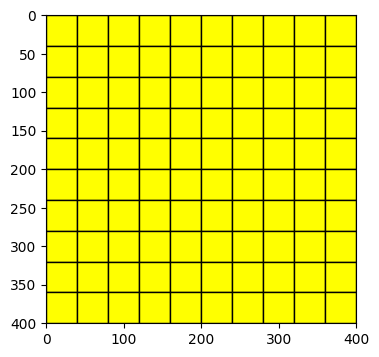

In [ ]:
# Problem Statement
# Implement an 'eraser' on a canvas.

# The canvas consists of a grid of blue 'cells' which are drawn as rectangles on the screen. We then create an eraser rectangle which, when dragged around the canvas, sets all of the rectangles it is in contact with to white.
!pip install matplotlib # install necessary library

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

CANVAS_WIDTH = 400
CANVAS_HEIGHT = 400

CELL_SIZE = 40
ERASER_SIZE = 20

# Function to erase objects by setting their color to white
def erase_objects(ax, eraser, objects):
    """Erase objects in contact with the eraser"""
    # Get eraser position
    eraser_x, eraser_y = eraser.get_xy()

    # Iterate through objects and check for overlap with the eraser
    for obj in objects:
        obj_x, obj_y = obj.get_xy()
        if (eraser_x < obj_x + CELL_SIZE and
            eraser_x + ERASER_SIZE > obj_x and
            eraser_y < obj_y + CELL_SIZE and
            eraser_y + ERASER_SIZE > obj_y):
            # If overlap is detected, set the object's color to white
            obj.set_facecolor('white')

# Main function
def main():
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(CANVAS_WIDTH/100, CANVAS_HEIGHT/100))
    ax.set_xlim(0, CANVAS_WIDTH)
    ax.set_ylim(0, CANVAS_HEIGHT)
    ax.invert_yaxis()  # Invert y-axis to match graphics.py coordinate system

    # Create grid of squares (cells)
    objects = []
    for row in range(CANVAS_HEIGHT // CELL_SIZE):
        for col in range(CANVAS_WIDTH // CELL_SIZE):
            # Create a rectangle patch for each cell
            rect = patches.Rectangle((col * CELL_SIZE, row * CELL_SIZE), CELL_SIZE, CELL_SIZE,
                                     linewidth=1, edgecolor='black', facecolor='yellow')
            # Add the rectangle to the axes and the objects list
            ax.add_patch(rect)
            objects.append(rect)

    # Display the initial grid
    plt.show(block=False)

    # Wait for a click to create the eraser
    while True:
        if plt.waitforbuttonpress(timeout=0.1):
            break

    # Get the coordinates of the click for the initial eraser position
    click_x, click_y = fig.ginput(1)[0]

    # Create the eraser as a pink rectangle
    eraser = patches.Rectangle((click_x, click_y), ERASER_SIZE, ERASER_SIZE,
                                linewidth=1, edgecolor='black', facecolor='pink')
    ax.add_patch(eraser)
    fig.canvas.draw_idle()  # Update the figure to show the eraser

    # Continuously move the eraser and erase objects
    while True:
        try:
            # Get the current mouse position
            mouse_x, mouse_y = fig.ginput(timeout=0.01, show_clicks=False)[0]
            # Move the eraser to the mouse position
            eraser.set_xy((mouse_x, mouse_y))
            # Erase objects in contact with the eraser
            erase_objects(ax, eraser, objects)
            # Update the figure to reflect changes
            fig.canvas.draw_idle()
        except IndexError:
            pass

        time.sleep(0.01)

# Call the main function if the script is run directly
if __name__ == '__main__':
    main()

In [ ]:
# Problem Statement
# In the information flow lesson, we discussed using a variable storing a number as an example of scope. We saw that changes we made to the number inside a function did not stay unless we returned it. This is true for what we call immutable data types which include things like numbers and strings.

# However, there are also mutable data types where changes stay even if we don't return anything. Some examples of mutable data types are lists and dictionaries. This means that you should be mindful when modifying lists and dictionaries within helper functions since their changes stay whether or not you return them.

# To see this in action, fill out the add_three_copies(...) function which takes a list and some data and then adds three copies of the data to the list. Don't return anything and see what happens! Compare this process to the x = change(x) example and note the differences.

# Here is an example run of this program (user input in bold italics):

# Enter a message to copy: Hello world!

# List before: []

# List after: ['Hello world!', 'Hello world!', 'Hello world!']

# (Note. The concept of immutable/mutable data types is called mutability. Be careful because different programming languages have different rules regarding mutability!)


# Solution
def add_three_copies(my_list, data):
    for i in range(3):
        my_list.append(data)

########## No need to edit code past this point

def main():
    message = input("Enter a message to copy: ")
    my_list = []
    print("List before:", my_list)
    add_three_copies(my_list, message)
    print("List after:", my_list)

if __name__ == "__main__":
    main()

Enter a message to copy: enter your name
List before: []
List after: ['enter your name', 'enter your name', 'enter your name']


In [4]:
# Problem Statement
# Fill out the function get_first_element(lst) which takes in a list lst as a parameter and prints the first element in the list. The list is guaranteed to be non-empty. We've written some code for you which prompts the user to input the list one element at a time.

# Solution
def get_first_element(lst):
    """
    Prints the first element of a provided list.
    """

    print(lst[0])

# There is no need to edit code beyond this point

def get_lst():
    """
    Prompts the user to enter one element of the list at a time and returns the resulting list.
    """
    lst = []
    elem: str = input("Please enter an element of the list or press enter to stop. ")
    while elem != "":
        lst.append(elem)
        elem = input("Please enter an element of the list or press enter to stop. ")
    return lst

def main():
    lst = get_lst()
    get_first_element(lst)


if __name__ == '__main__':
    main()


Please enter an element of the list or press enter to stop. enter
Please enter an element of the list or press enter to stop. sleep
Please enter an element of the list or press enter to stop. 
enter


In [14]:
# Problem Statement
# Fill out the function get_last_element(lst) which takes in a list lst as a parameter and prints the last element in the list. The list is guaranteed to be non-empty, but there are no guarantees on its length.

def get_lst():
    """
    Prompts the user to enter one element of the list at a time and returns the resulting list.
    """
    lst = []
    elem: str = input("Please enter an element of the list or press enter to stop. ")
    while elem != "":
        lst.append(elem)
        elem = input("Please enter an element of the list or press enter to stop. ")
    return lst

# Call the get_lst function to get the list from the user
lst = get_lst()

# Now you can access lst because it's defined in the current scope
# Takes the length of the list and minuses 1 since they are zero-indexed (we start counting at 0)
print(lst[len(lst) - 1])

# The line below works too!!
# print(lst[-1])

Please enter an element of the list or press enter to stop. 23
Please enter an element of the list or press enter to stop. 13
Please enter an element of the list or press enter to stop. 
13


In [6]:
# Problem Statement
# Write a program which continuously asks the user to enter values which are added one by one into a list. When the user presses enter without typing anything, print the list.

# Here's a sample run (user input is in blue):

# Enter a value: 1 Enter a value: 2 Enter a value: 3 Enter a value: Here's the list: ['1', '2', '3']

# Solution
def main():
    lst = []  # Make an empty list to store things in

    val = input("Enter a value: ")  # Get an initial value
    while val:  # While the user input isn't an empty value
        lst.append(val) # Add val to list
        val = input("Enter a value: ")  # Get the next value to add

    print("Here's the list:", lst)


# There is no need to edit code beyond this point

if __name__ == '__main__':
    main()

Enter a value: 23
Enter a value: 56
Enter a value: 
Here's the list: ['23', '56']


In [8]:
# Problem Statement
# Fill out the function shorten(lst) which removes elements from the end of lst, which is a list, and prints each item it removes until lst is MAX_LENGTH items long. If lst is already shorter than MAX_LENGTH you should leave it unchanged. We've written a main() function for you which gets a list and passes it into your function once you run the program. For the autograder to pass you will need MAX_LENGTH to be 3, but feel free to change it around to test your program.


# Solution
MAX_LENGTH : int = 3

def shorten(lst):
    while len(lst) > MAX_LENGTH:
        last_elem = lst.pop()
        print(last_elem)

# There is no need to edit code beyond this point

def get_lst():
    """
    Prompts the user to enter one element of the list at a time and returns the resulting list.
    """
    lst = []
    elem = input("Please enter an element of the list or press enter to stop. ")
    while elem != "":
        lst.append(elem)
        elem = input("Please enter an element of the list or press enter to stop. ")
    return lst

def main():
    lst = get_lst()
    shorten(lst)


if __name__ == '__main__':
    main()

Please enter an element of the list or press enter to stop. python
Please enter an element of the list or press enter to stop. agentic ai
Please enter an element of the list or press enter to stop. 
